In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt    
import numpy as np

In [3]:
# Choose current directory
directory = os.getcwd()  
# List to hold DataFrames
dataframes = []
# Iterate through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        if 'cos_angle' in df.columns:
            dataframes.append(df)
# Concatenate all DataFrames into one
all_data = pd.concat(dataframes, ignore_index=True)

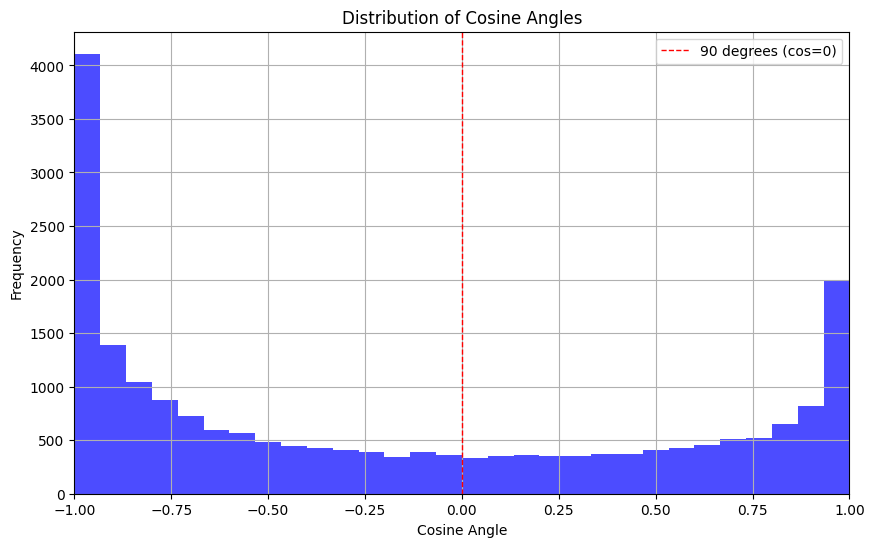

In [4]:
# Plotting the cos_angle values in a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(all_data['cos_angle'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Cosine Angles')
plt.xlabel('Cosine Angle')
plt.ylabel('Frequency')
plt.xlim(-1, 1)
plt.axvline(0, color='red', linestyle='dashed', linewidth=1, label='90 degrees (cos=0)')
plt.legend()
plt.grid()
plt.show() 

/Users/mtran/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


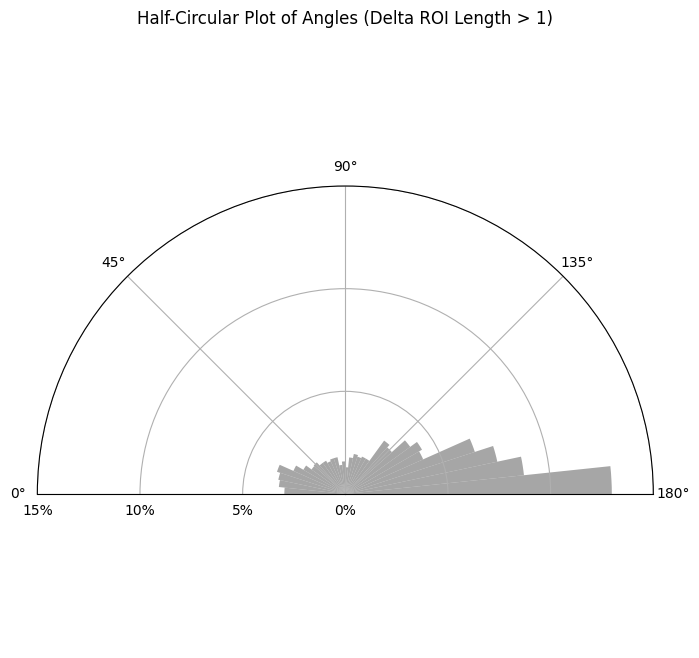

In [9]:
#Plotting half-circular plot of angles where movement is > 1 micron
angles = np.arccos(all_data.loc[(all_data['delta_roi_length'] > 1) & (all_data['cos_angle'].notna()), 'cos_angle'])
angles = angles.dropna()
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('W')
ax.set_theta_direction(-1)
ax.set_thetamin(0)
ax.set_thetamax(180)

counts, bins = np.histogram(angles, bins=30, range=(0, np.pi))
percent = counts / counts.sum() * 100
bin_centers = (bins[:-1] + bins[1:]) / 2

ax.bar(bin_centers, percent, width=np.diff(bins), color='gray', alpha=0.7)
ax.set_title('Half-Circular Plot of Angles (Delta ROI Length > 1)')
ax.set_xticks(np.linspace(0, np.pi, 5))
ax.set_xticklabels([f'{int(np.degrees(tick))}°' for tick in np.linspace(0, np.pi, 5)])
ax.grid(True)
ax.set_yticks(np.linspace(0, 15, 4))
ax.set_yticklabels([f'{int(y)}%' for y in np.linspace(0, 15, 4)], fontsize=8)
#Uncomment to save as svg
# plt.savefig('angle_distribution.svg', format='svg')
plt.show()


In [6]:
#Get the percentage of angles that are more than 90 degrees
num_greater_90 = np.sum(angles > (np.pi / 2))
total_angles = len(angles)
percentage_greater_90 = (num_greater_90 / total_angles) * 100
print(f'Percentage of angles greater than 90 degrees: {percentage_greater_90:.2f}%')

Percentage of angles greater than 90 degrees: 65.54%


In [7]:
#Get the number of tracks there are in each csv file and how many csv files and how many angles are plotted in total
num_files = len(dataframes)
num_tracks = all_data['track_id'].nunique()
num_angles = len(angles)
print(f'Number of CSV files: {num_files}')
print(f'Number of unique tracks: {num_tracks}')
print(f'Number of angles plotted: {num_angles}')

Number of CSV files: 7
Number of unique tracks: 109
Number of angles plotted: 2458


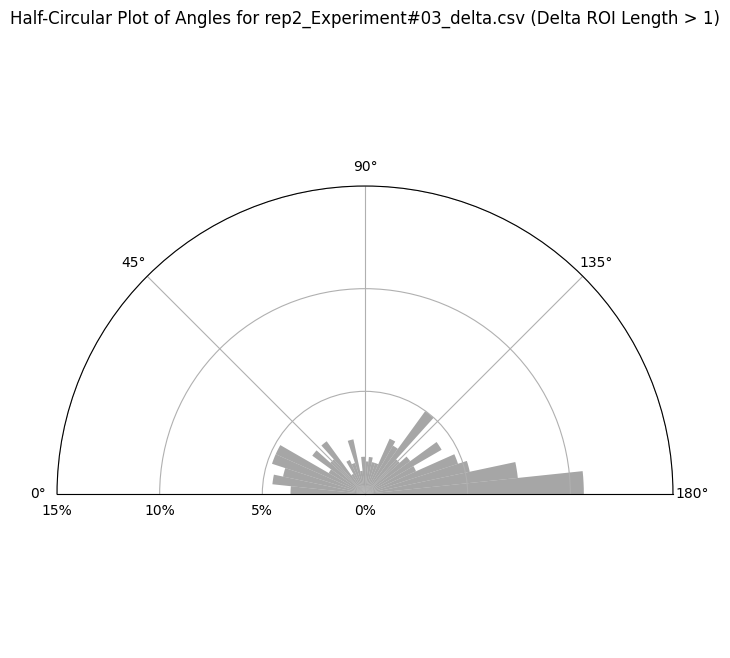

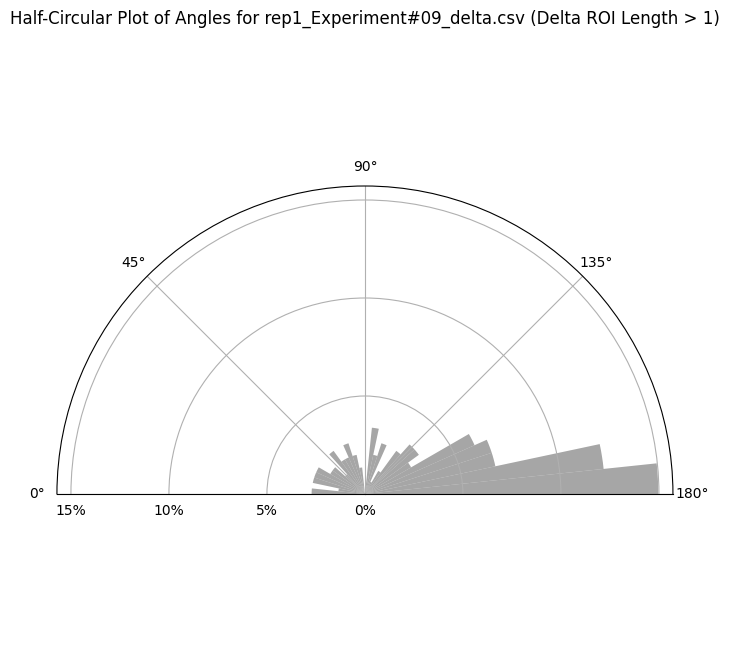

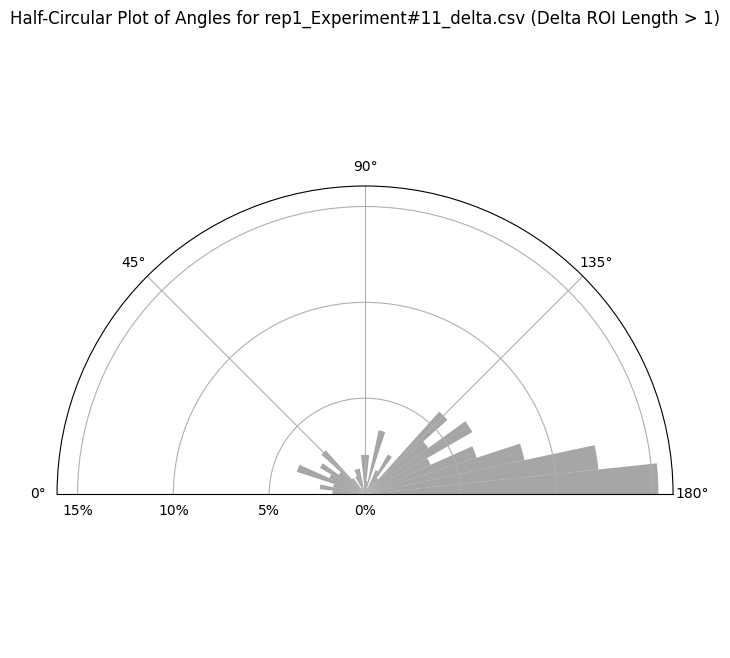

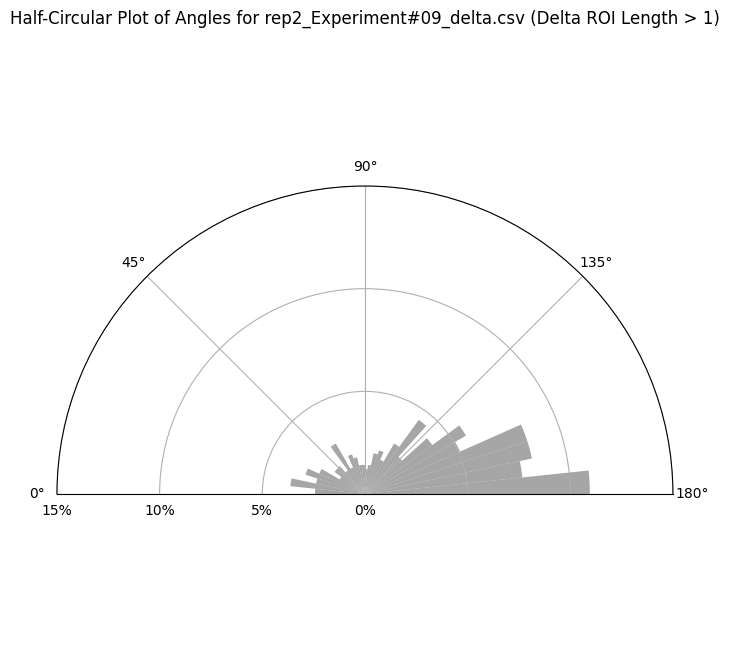

/Users/mtran/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


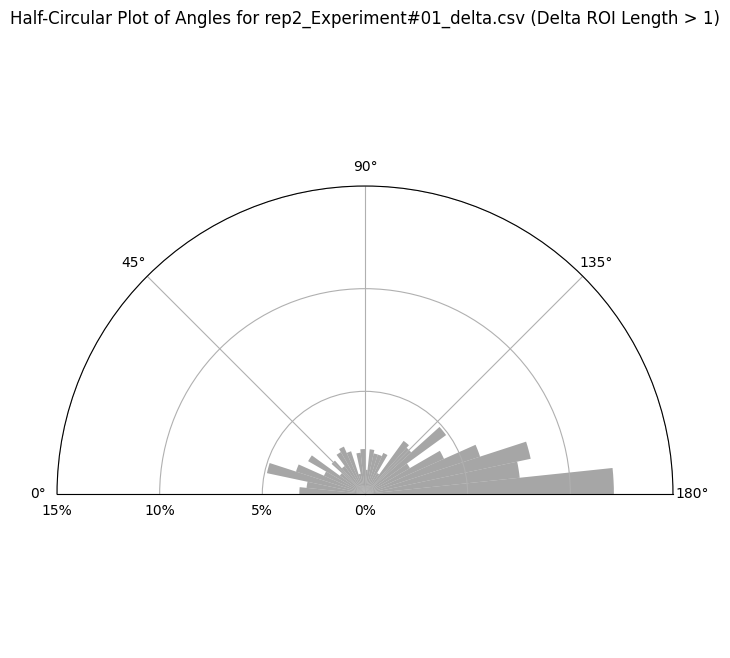

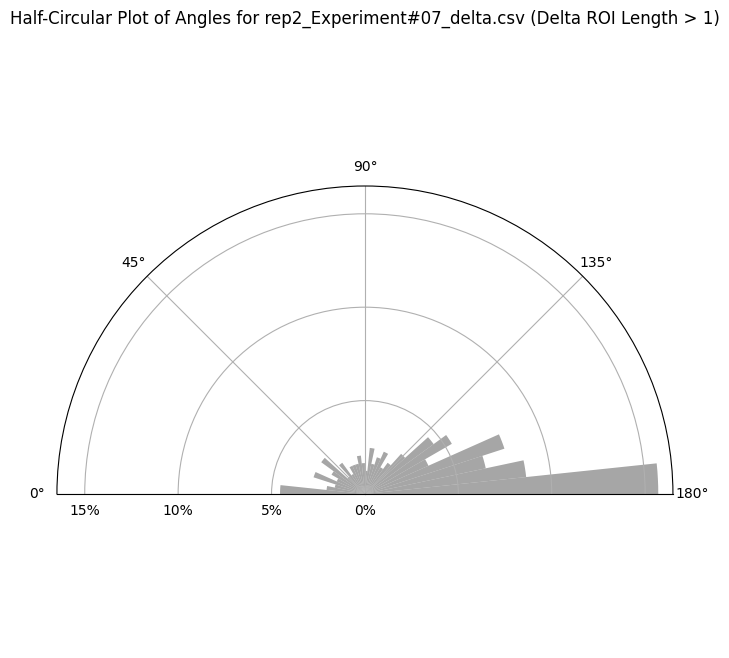

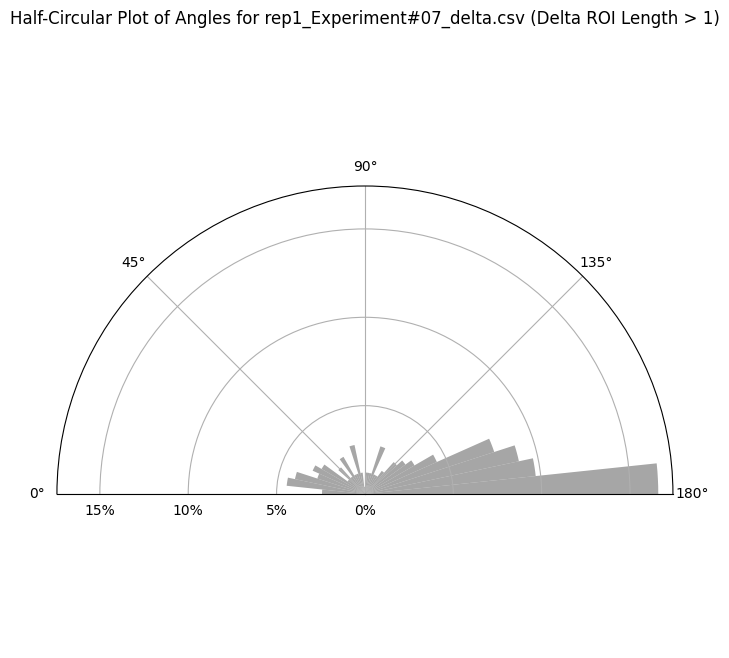

In [ ]:
#do the polar plots for every single csv file and print it out
for filename in os.listdir(directory): 
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        if 'cos_angle' in df.columns:
            angles = np.arccos(df.loc[(df['delta_roi_length'] > 1) & (df['cos_angle'].notna()), 'cos_angle'])
            angles = angles.dropna()
            plt.figure(figsize=(8, 8))
            ax = plt.subplot(111, projection='polar')
            ax.set_theta_zero_location('W')
            ax.set_theta_direction(-1)
            ax.set_thetamin(0)
            ax.set_thetamax(180)

            counts, bins = np.histogram(angles, bins=30, range=(0, np.pi))
            percent = counts / counts.sum() * 100
            bin_centers = (bins[:-1] + bins[1:]) / 2

            ax.bar(bin_centers, percent, width=np.diff(bins), color='gray', alpha=0.7)
            ax.set_title(f'Half-Circular Plot of Angles for {filename} (Delta ROI Length > 1)')
            ax.set_xticks(np.linspace(0, np.pi, 5))
            ax.set_xticklabels([f'{int(np.degrees(tick))}°' for tick in np.linspace(0, np.pi, 5)])
            ax.grid(True)
            ax.set_yticks(np.linspace(0, 15, 4))
            ax.set_yticklabels([f'{int(y)}%' for y in np.linspace(0, 15, 4)], fontsize=8)
            #Uncomment to save as svg
            # plt.savefig(f'angle_distribution_{filename}.svg', format='svg')
            plt.show()
